# Skin Cancer Classification

In [1]:
# impoting important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhaveshmittal/melanoma-cancer-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'melanoma-cancer-dataset' dataset.
Path to dataset files: /kaggle/input/melanoma-cancer-dataset


In [3]:
test_dir = os.path.join(path, 'test')
train_dir = os.path.join(path, 'train')

In [4]:
# image size and batch size
img_size = (224, 224)
batch_size = 32

In [5]:
# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
# rescaling only for testing
test_datagen = ImageDataGenerator(rescale=1./255)
# load traning data
train_generatar = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
# loading testing data
test_generatar = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode = 'binary'
)
# printing class labels
print("class labels",train_generatar.class_indices)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
class labels {'Benign': 0, 'Malignant': 1}


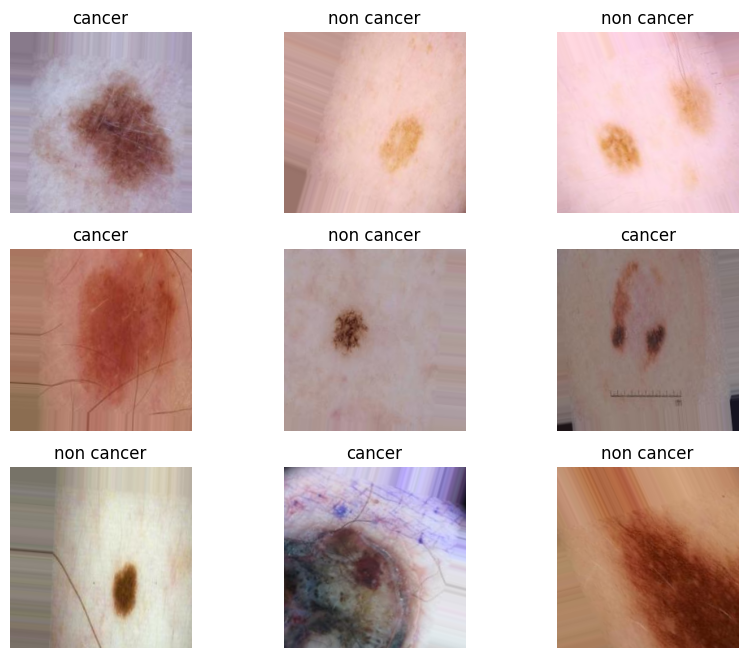

In [6]:
# display some sample images from data set
def plot_images():
  images,labels=next(train_generatar)
  plt.figure(figsize=(10,8))
  for i in range(9):
    plt.subplot(3,3,i+1) # Changed from (3,3,i+1) to (5,5,i+1) to accommodate 25 images
    plt.imshow(images[i])
    plt.title('cancer' if labels[i] == 1 else 'non cancer')
    plt.axis('off')
  plt.show()
plot_images()


In [7]:
from sklearn import metrics
from matplotlib import MatplotlibDeprecationWarning
# model building
model = Sequential([
    # first layer
    Conv2D(33,(3,3),activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    # secound 2 layer
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    # third layer
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    # fourth kayer
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    # Flattening Layer
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification

])
# compiling the model
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 33)   │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 33)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,264,413 (73.49 MB)

 Trainable params: 19,264,413 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# early stoping
early_stoping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
# fiting the model
history = model.fit(
    train_generatar,
    steps_per_epoch=train_generatar.samples // batch_size,
    epochs=12,
    validation_data=test_generatar,
    validation_steps=test_generatar.samples // batch_size,
    callbacks = early_stoping
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 216s 557ms/step - accuracy: 0.6841 - loss: 0.5847 - val_accuracy: 0.7666 - val_loss: 0.5199
Epoch 2/12
  1/371 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.8750 - loss: 0.3417

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8750 - loss: 0.3417 - val_accuracy: 0.7697 - val_loss: 0.5223
Epoch 3/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 149s 400ms/step - accuracy: 0.7977 - loss: 0.4444 - val_accuracy: 0.7752 - val_loss: 0.4446
Epoch 4/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8125 - loss: 0.4983 - val_accuracy: 0.7540 - val_loss: 0.4797
Epoch 5/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 148s 400ms/step - accuracy: 0.8196 - loss: 0.3995 - val_accuracy: 0.8579 - val_loss: 0.3504
Epoch 6/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7500 - loss: 0.4504 - val_accuracy: 0.8548 - val_loss: 0.3432
Epoch 7/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 147s 395ms/step - accuracy: 0.8223 - loss: 0.3938 - val_accuracy: 0.8402 - val_loss: 0.3502
Epoch 8/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9062 - loss: 0.2931 - val_accuracy: 0.8458 - val_loss: 0.3445
Epoch 9/12
371/371 ━━━━━━━━━━━━━━━━━━━━ 202s 546ms/step - accuracy: 0.8274 - loss: 0.3818 - val_accurac

In [20]:
from google.colab import files
files.download("skin_cancer_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# checking the accuracy and loss of the model
loss , accuracy = model.evaluate(test_generatar)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8580 - loss: 0.3388
Test Loss: 0.3458
Test Accuracy: 85.50%


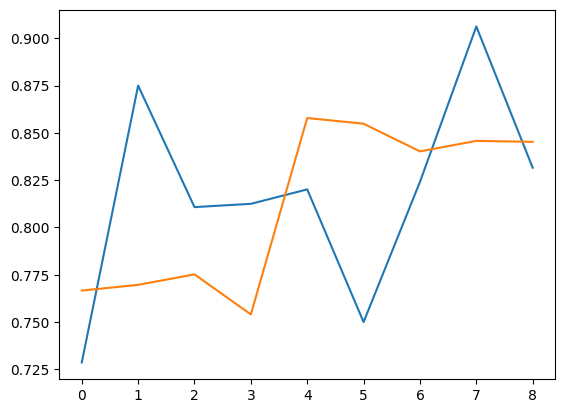

In [11]:
# ploting the accuracy score of the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      1000
           1       0.48      0.51      0.50       984

    accuracy                           0.49      1984
   macro avg       0.49      0.49      0.49      1984
weighted avg       0.49      0.49      0.49      1984



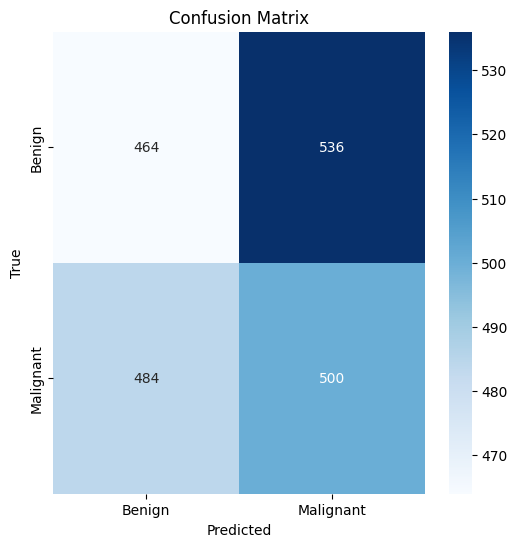

In [12]:
# Predict on the test set
test_pred = model.predict(test_generatar, steps=test_generatar.samples // batch_size, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")

# Get the true labels
test_true_labels = test_generatar.classes[:len(test_pred_labels)]  # Match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generatar.class_indices.keys(), yticklabels=train_generatar.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Save the trained model first
model.save('/kaggle/working/skin_cancer_cnn.h5')

# Load the entire model
model = load_model('/kaggle/working/skin_cancer_cnn.h5')


def predict_skin_cancer(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    class_label = "Malignant" if prediction > 0.5 else "Benign"

    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


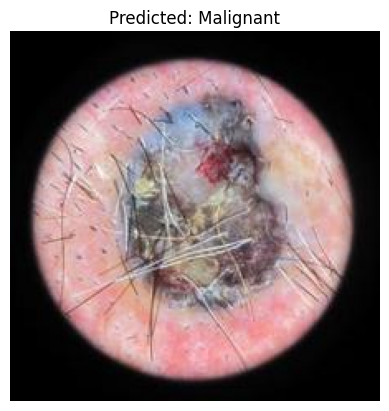

In [14]:
# Test on new image
predict_skin_cancer("/kaggle/input/melanoma-cancer-dataset/test/Malignant/5616.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


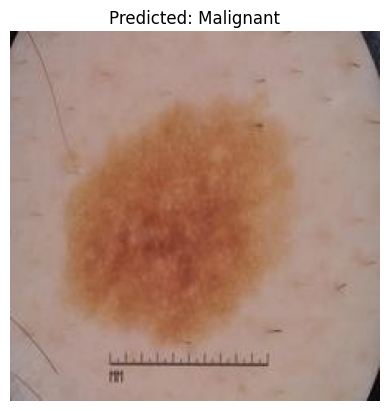

In [15]:
# Test on new image
predict_skin_cancer("/kaggle/input/melanoma-cancer-dataset/train/Malignant/1005.jpg", model)